In [3]:
import SimpleITK as sitk 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import numpy as np


In [32]:



def Atlas(patient_list=[],data_paths='path',slices=[]):
    segs=['seg_0','seg_1','seg_2','seg_3','seg_4']
    seg_data=[]
    for i in range(len(patient_list)):
        file_p_mask = data_paths+'\{}\prostaat.mhd'.format(patient_list[i])
        print(file_p_mask)
        readable_mask=imageio.imread(file_p_mask)
        readable_mask=readable_mask[slices[i],:,:]
        segs[i]= readable_mask
        seg_data.append(segs[i])
    
    segs_itk=['seg0_itk','seg1_itk','seg2_itk','seg3_itk','seg4_itk']

    seg_stack=[]
    for i in range(len(segs)):
         segs_itk[i]= sitk.GetImageFromArray(seg_data[i].astype(np.int16))
         seg_stack.append(segs_itk[i])


# Run STAPLE algorithm
    STAPLE_seg_sitk = sitk.STAPLE(seg_stack,1, 1.0)# 1.0 specifies the foreground value


# convert back to numpy array
    STAPLE_seg = sitk.GetArrayFromImage(STAPLE_seg_sitk)

    for i in range(STAPLE_seg.shape[0]):
        for j in range(STAPLE_seg.shape[1]):
            if STAPLE_seg[i,j]<0.5:
                STAPLE_seg[i,j]=0
            else:
                STAPLE_seg[i,j]=1
    return STAPLE_seg

In [42]:
patient_list=['p107','p107','p107','p107', 'p107']
data_path=r'C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData'
slices=[34,42,39,33,45]

multi_atlas=Atlas(patient_list,data_path,slices)



C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd


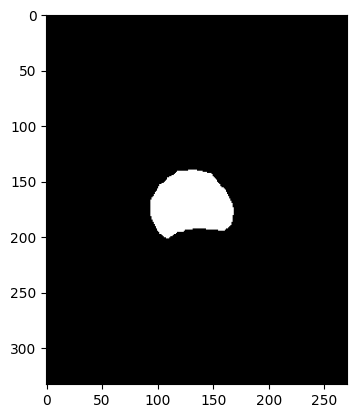

In [43]:
plt.imshow(multi_atlas,cmap='gray')

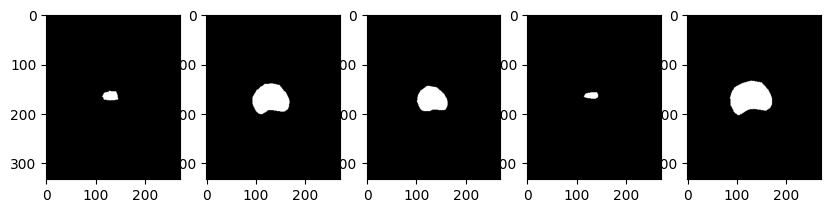

In [44]:
data_path=r'C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd'
im=imageio.imread(data_path)

fig,ax=plt.subplots(1,5,figsize=(10,10))

ax[0].imshow(im[34,:,:],cmap='gray')
ax[1].imshow(im[42,:,:],cmap='gray')
ax[2].imshow(im[39,:,:],cmap='gray')
ax[3].imshow(im[33,:,:],cmap='gray')
ax[4].imshow(im[45,:,:],cmap='gray')